# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?

3.   **How would you proceed?**


==> ENTER YOUR RESPONSES HERE
To build random forest model to determine whether a video contains a claim or whether it offers an opinion.

TikTok users can report videos that they believe violate the platform's terms of service. Because there are millions of TikTok videos created and viewed every day, this means that many videos get reported—too many to be individually reviewed by a human moderator.
Analysis indicates that when authors do violate the terms of service, they're much more likely to be presenting a claim than an opinion. Therefore, it is useful to be able to determine which videos make claims and which videos are opinions.
TikTok wants to build a machine learning model to help identify claims and opinions. Videos that are labeled opinions will be less likely to go on to be reviewed by a human moderator. Videos that are labeled as claims will be further sorted by a downstream process to determine whether they should get prioritized for review. For example, perhaps videos that are classified as claims would then be ranked by how many times they were reported, then the top x% would be reviewed by a human each day.
A machine learning model would greatly assist in the effort to present human moderators with videos that are most likely to be in violation of TikTok's terms of service.
The data dictionary shows that there is a column called claim_status. This is a binary value that indicates whether a video is a claim or an opinion. This will be the target variable. In other words, for each video, the model should predict whether the video is a claim or an opinion.
This is a classification task because the model is predicting a binary class.



Will be using precision, recall, accuracy and f1 score to evaluate the success of my business/organizational objective

To determine which evaluation metric might be best, consider how the model might be wrong. There are two possibilities for bad predictions:
False positives: When the model predicts a video is a claim when in fact it is an opinion
False negatives: When the model predicts a video is an opinion when in fact it is a claim



will need to evaluate if there will be overfitting issue, which may eventually lead to false postive or false negative issue
for false negative prediction, when the model predicts a video does not contain a claim and it actually does, in this case, the video will not be reviewed and investigated by the moderator and will not be to properly address the user report regarding the video
for false positive prediction, when the model says a video does contain a claim and it actually does not, in this case, company resource will be wasted because the moderator will review the video content which in fact does not contain a claim
ensure the model has a high f1 score which will evaluate the model predictive power based on the combination of precision and recall 


In the given scenario, it's better for the model to predict false positives when it makes a mistake, and worse for it to predict false negatives. It's very important to identify videos that break the terms of service, even if that means some opinion videos are misclassified as claims. The worst case for an opinion misclassified as a claim is that the video goes to human review. The worst case for a claim that's misclassified as an opinion is that the video does not get reviewed and it violates the terms of service. A video that violates the terms of service would be considered posted from a "banned" author, as referenced in the data dictionary.
Because it's more important to minimize false negatives, the model evaluation metric will be recall.


Previous work with this data has revealed that there are ~20,000 videos in the sample. This is sufficient to conduct a rigorous model validation workflow, broken into the following steps:
Split the data into train/validation/test sets (60/20/20)
Fit models and tune hyperparameters on the training set
Perform final model selection on the validation set
Assess the champion model's performance on the test set

### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [226]:
# Import packages for data manipulation
### YOUR CODE HERE ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import packages for data visualization
### YOUR CODE HERE ###

import pickle
# Import packages for data preprocessing
### YOUR CODE HERE ###
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

# Import packages for data modeling
### YOUR CODE HERE ###
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.metrics import classification_report,precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from xgboost import XGBClassifier, plot_importance

Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [4]:
# Display first few rows
### YOUR CODE HERE ###
data.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


Get the number of rows and columns in the dataset.

In [5]:
# Get number of rows and columns
### YOUR CODE HERE ###
data.shape

(19382, 12)

Get the data types of the columns.

In [6]:
# Get data types of columns
### YOUR CODE HERE ###
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [7]:
# Get basic information
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [8]:
# Generate basic descriptive stats
### YOUR CODE HERE ###
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [9]:
# Check for missing values
### YOUR CODE HERE ###
data.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [87]:
# Drop rows with missing values
### YOUR CODE HERE ###
data_subset=data.dropna()

In [26]:

# Display first few rows after handling missing values
### YOUR CODE HERE ###
data_subset.isnull().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
length_count                0
dtype: int64

Check for and handle duplicates.

In [14]:
# Check for duplicates
### YOUR CODE HERE ###
data_subset.duplicated().sum()

0

Check for and handle outliers.

Tree-based models are robust to outliers, so there is no need to impute or drop any values based on where they fall in their distribution.

In [ ]:
### YOUR CODE HERE ###


Check class balance.

In [15]:
# Check class balance
### YOUR CODE HERE ###
data_subset["claim_status"].value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [93]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
### YOUR CODE HERE ##
data_subset["text_length"]=data_subset["video_transcription_text"].str.len()

/tmp/ipykernel_111/1434732615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset["text_length"]=data_subset["video_transcription_text"].str.len()


In [31]:
data_subset

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19079,19080,opinion,1492320297,49,in our opinion the earth holds about 11 quinti...,not verified,active,6067.0,423.0,81.0,8.0,2.0,65
19080,19081,opinion,9841347807,23,in our opinion the queens in ant colonies live...,not verified,active,2973.0,820.0,70.0,3.0,0.0,66
19081,19082,opinion,8024379946,50,in our opinion the moon is moving away from th...,not verified,active,734.0,102.0,7.0,2.0,1.0,53
19082,19083,opinion,7425795014,8,in our opinion lightning strikes somewhere on ...,not verified,active,3394.0,655.0,123.0,11.0,4.0,80


Calculate the average text_length for claims and opinions.

In [95]:
data_subset.dtypes


#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
text_length                   int64
dtype: object

In [38]:
# Calculate the average text_length for claims and opinions
### YOUR CODE HERE ###
claim_status_plot=data_subset[["claim_status", "text_length"]].groupby(["claim_status"]).mean()["text_length"]

Visualize the distribution of `text_length` for claims and opinions.

Text(0.5, 1.0, 'Distribution of video_transcription_text length for claims and opinions')

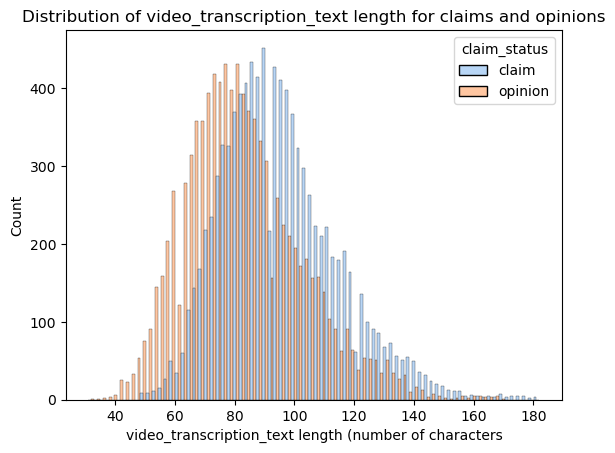

In [64]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot
### YOUR CODE HERE ###
sns.histplot(data_subset, stat="count", palette="pastel",element="bars", legend=True,multiple="dodge",x="text_length", hue="claim_status")
plt.xlabel("video_transcription_text length (number of characters")
plt.title("Distribution of video_transcription_text length for claims and opinions")

**Feature selection and transformation**

Encode target and catgorical variables.

In [91]:
# Create a copy of the X data
### YOUR CODE HERE ###
x=data_subset.drop(["#","video_id", "claim_status", "video_transcription_text"], axis=1)
y=data_subset["claim_status"]
# Drop unnecessary columns
### YOUR CODE HERE ###

# Encode target variable
### YOUR CODE HERE ###
y=y.replace({"claim":1, "opinion":0}).reset_index(drop=True)
# Dummy encode remaining categorical values
### YOUR CODE HERE ###
x=pd.get_dummies(x, columns=["verified_status", "author_ban_status"], drop_first=True)

### **Task 4: Split the data**

Assign target variable.

In [77]:
# Isolate target variable
### YOUR CODE HERE ###
y

0        1
1        1
2        1
3        1
4        1
        ..
19079    0
19080    0
19081    0
19082    0
19083    0
Name: claim_status, Length: 19084, dtype: int64

Isolate the features.

In [99]:
# Isolate features
### YOUR CODE HERE ###
x
# Display first few rows of features dataframe
### YOUR CODE HERE ###


,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,verified_status_verified,author_ban_status_banned,author_ban_status_under review,video_transcription_text,text_length
0,59,343296.0,19425.0,241.0,1.0,0.0,False,False,True,someone shared with me that drone deliveries a...,97
1,32,140877.0,77355.0,19034.0,1161.0,684.0,False,False,False,someone shared with me that there are more mic...,107
2,31,902185.0,97690.0,2858.0,833.0,329.0,False,False,False,someone shared with me that american industria...,137
3,25,437506.0,239954.0,34812.0,1234.0,584.0,False,False,False,someone shared with me that the metro of st. p...,131
4,19,56167.0,34987.0,4110.0,547.0,152.0,False,False,False,someone shared with me that the number of busi...,128
...,...,...,...,...,...,...,...,...,...,...,...
19079,49,6067.0,423.0,81.0,8.0,2.0,False,False,False,in our opinion the earth holds about 11 quinti...,65
19080,23,2973.0,820.0,70.0,3.0,0.0,False,False,False,in our opinion the queens in ant colonies live...,66
19081,50,734.0,102.0,7.0,2.0,1.0,False,False,False,in our opinion the moon is moving away from th...,53
19082,8,3394.0,655.0,123.0,11.0,4.0,False,False,False,in our opinion lightning strikes somewhere on ...,80


#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [100]:
# Split the data into training and testing sets
### YOUR CODE HERE ###
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [194]:
# Split the training data into training and validation sets
### YOUR CODE HERE ###
x_tr, x_val, y_tr, y_val=train_test_split(x_train, y_train, test_size=0.25, random_state=0)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [195]:
# Get shape of each training, validation, and testing set
### YOUR CODE HERE ###
print("x_train: ", x_tr.shape)
print("x_test: ", x_test.shape)
print("x_val: ", x_val.shape)
print("y_train: ", y_tr.shape)
print("y_test: ", y_test.shape)
print("y_val: ", y_val.shape)

x_train:  (11450, 11)
x_test:  (3817, 11)
x_val:  (3817, 11)
y_train:  (11450,)
y_test:  (3817,)
y_val:  (3817,)


In [196]:
# Set up a `CountVectorizer` object, which converts a collection of text to a matrix of token counts
count_vec=CountVectorizer(ngram_range=(2,3), max_features=15, stop_words="english")
count_vec

CountVectorizer(max_features=15, ngram_range=(2, 3), stop_words='english')

In [198]:
count_data=count_vec.fit_transform(x_tr["video_transcription_text"]).toarray()
count_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [199]:
count_df=pd.DataFrame(count_data, columns=count_vec.get_feature_names_out())
count_df

,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11445,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11447,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
11448,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [200]:
x_train_final=pd.concat([x_tr.drop(columns=["video_transcription_text"]).reset_index(drop=True),count_df], axis=1)
x_train_final

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,verified_status_verified,author_ban_status_banned,author_ban_status_under review,text_length,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,51,2487.0,310.0,20.0,1.0,0.0,False,False,False,134,...,0,0,0,0,0,0,0,0,0,0
1,43,118512.0,3543.0,374.0,70.0,29.0,False,True,False,97,...,0,1,0,0,0,0,0,0,0,0
2,22,105902.0,1885.0,229.0,39.0,9.0,False,False,True,76,...,0,1,0,0,0,0,0,0,0,0
3,17,9245.0,1670.0,440.0,13.0,4.0,False,False,False,58,...,0,0,0,0,0,0,0,0,0,0
4,18,3791.0,660.0,63.0,9.0,1.0,False,False,False,57,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11445,39,6358.0,1599.0,307.0,27.0,0.0,True,False,False,73,...,0,0,0,0,0,0,0,0,0,1
11446,19,1972.0,379.0,43.0,4.0,0.0,False,False,False,69,...,0,0,0,0,0,0,0,0,0,0
11447,34,843938.0,559393.0,2375.0,12643.0,4104.0,False,False,False,142,...,0,0,0,0,0,0,0,1,0,0
11448,21,5922.0,1815.0,44.0,29.0,10.0,False,False,False,106,...,0,0,0,0,0,0,0,0,0,0


In [201]:
val_count_data=count_vec.transform(x_val["video_transcription_text"]).toarray()
val_count_df=pd.DataFrame(val_count_data, columns=count_vec.get_feature_names_out())
val_count_df
x_val_final=pd.concat([x_val.drop(["video_transcription_text"], axis=1).reset_index(drop=True),val_count_df], axis=1)
x_val_final

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,verified_status_verified,author_ban_status_banned,author_ban_status_under review,text_length,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,11,578891.0,379596.0,14612.0,6591.0,44.0,False,False,True,72,...,0,0,0,0,0,0,0,1,0,0
1,24,6255.0,1709.0,311.0,13.0,1.0,False,False,False,96,...,0,0,0,0,0,0,0,0,0,0
2,35,410356.0,249714.0,26235.0,2060.0,1252.0,False,False,False,88,...,0,1,0,0,0,0,0,1,0,0
3,58,406911.0,25986.0,1230.0,564.0,248.0,False,False,False,83,...,0,0,0,0,0,0,0,0,0,0
4,47,972573.0,138167.0,25320.0,3331.0,968.0,False,False,True,104,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,54,986192.0,488152.0,130586.0,12109.0,3436.0,False,False,True,130,...,0,0,1,0,0,0,0,0,0,0
3813,9,78086.0,35655.0,13509.0,445.0,293.0,False,False,False,84,...,0,0,0,0,0,1,0,0,0,0
3814,41,199971.0,117234.0,2104.0,2897.0,1191.0,False,False,False,107,...,0,1,0,0,0,0,0,0,0,0
3815,35,906448.0,565674.0,190444.0,12134.0,608.0,False,False,False,120,...,0,0,0,0,0,0,0,0,0,0


In [202]:
x_test_vec=count_vec.transform(x_test["video_transcription_text"]).toarray()
x_test_df=pd.DataFrame(x_test_vec, columns=count_vec.get_feature_names_out())
x_test_df
x_test_final=pd.concat([x_test.drop(columns=["video_transcription_text"]).reset_index(drop=True), x_test_df], axis=1)
x_test_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,verified_status_verified,author_ban_status_banned,author_ban_status_under review,text_length,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,54,692084.0,135956.0,16591.0,622.0,312.0,False,False,False,107,...,0,0,0,1,1,0,0,0,0,0
1,37,5164.0,1858.0,36.0,17.0,1.0,True,False,True,69,...,0,0,0,0,0,0,0,0,0,0
2,39,801951.0,344163.0,57608.0,8578.0,2942.0,False,False,False,90,...,0,0,0,0,0,0,0,0,0,0
3,44,6429.0,2314.0,847.0,17.0,5.0,False,False,False,76,...,0,0,0,0,0,0,0,0,0,0
4,26,555780.0,106863.0,15348.0,252.0,91.0,False,False,False,72,...,0,0,0,0,0,0,0,0,0,0


### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [203]:
# Instantiate the random forest classifier
### YOUR CODE HERE ###
rf=RandomForestClassifier(random_state=0)
# Create a dictionary of hyperparameters to tune
### YOUR CODE HERE ###
rf_params={"max_depth":[5,7,None], 
           "min_samples_leaf":[1,2], 
           "min_samples_split":[2,3], 
           "max_features":[0.3,0.6], 
           "max_samples":[0.7], 
           "n_estimators":[75,100,200]}

# Define a dictionary of scoring metrics to capture
### YOUR CODE HERE ###
scoring={"precision", "recall", "accuracy", "f1"}
# Instantiate the GridSearchCV object
### YOUR CODE HERE ###
clf=GridSearchCV(rf, rf_params, scoring=scoring,cv=5,refit="recall")


In [204]:
clf.fit(x_train_final, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring={'f1', 'recall', 'precision', 'accuracy'})

In [152]:
pickle.dump(clf, open('clf.pickle', 'wb'))

In [205]:
# Examine best recall score
### YOUR CODE HERE ###
clf.best_score_

0.9949955369184023

In [206]:
  # Get all the results from the CV and put them in a df
### YOUR CODE HERE ###
#clf.cv_results_
#cv_df=pd.DataFrame(clf.cv_results_)
#cv_df.iloc[cv_df["mean_test_recall"].idxmax(), :]

def cv_result (model_name, model_object):
    cv_df=pd.DataFrame(model_object.cv_results_)
    cv_df_result=cv_df.iloc[cv_df["mean_test_recall"].idxmax(), :]
  # Isolate the row of the df with the max(mean precision score)
### YOUR CODE HERE ###
    precision=cv_df_result.mean_test_precision
    recall=cv_df_result.mean_test_recall
    accuracy=cv_df_result.mean_test_accuracy
    f1=cv_df_result.mean_test_f1
    table=pd.DataFrame({"model_name":[model_name], "precision":[precision], "recall":[recall], "accuracy":[accuracy], "f1":[f1]})
    return table

rfcv_result=cv_result("random_forest", clf)
rfcv_result

,model_name,precision,recall,accuracy,f1
0,random_forest,0.999481,0.994996,0.997205,0.997231


In [207]:
# Examine best parameters
### YOUR CODE HERE ###
clf.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

**Question:** How well is your model performing? Consider average recall score and precision score.
This model performs exceptionally well, with an average recall score of 0.995 across the five cross-validation folds. After checking the precision score to be sure the model is not classifying all samples as claims, it is clear that this model is making almost perfect classifications.

### **Build an XGBoost model**

In [236]:
# Instantiate the XGBoost classifier
### YOUR CODE HERE ###
xgb=XGBClassifier(objective="binary:logistic", random_state=0)
# Create a dictionary of hyperparameters to tune
### YOUR CODE HERE ###
xgb_param={"max_depth":[4,8,12], "min_child_weight":[3,5], "learning_rate":[0.01, 0.1], "n_estimators":[300,500]}
# Define a dictionary of scoring metrics to capture
### YOUR CODE HERE ###
scoring={"precision", "recall", "accuracy", "f1"}
# Instantiate the GridSearchCV object
### YOUR CODE HERE ###
xgb_cv=GridSearchCV(xgb, xgb_param, scoring=scoring, cv=5, refit="recall")
xgb_cv.fit(x_train_final, y_tr)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring={'f1', 'recall', 'precision', 'accuracy'})

In [237]:
  # Get all the results from the CV and put them in a df
### YOUR CODE HERE ###
print(xgb_cv.best_score_)
  # Isolate the row of the df with the max(mean precision score)
### YOUR CODE HERE ###
xgb_cv_result=cv_result("xgb", xgb_cv)
xgb_cv_result

0.9906808769992594


,model_name,precision,recall,accuracy,f1
0,xgb,0.999652,0.990681,0.995109,0.995142


In [238]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 300}

**Question:** How well does your model perform? Consider recall score and precision score.
This model also performs exceptionally well. Although its recall score is very slightly lower than the random forest model's, its precision score is perfect.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [239]:
clf.best_estimator_

RandomForestClassifier(max_features=0.6, max_samples=0.7, n_estimators=200,
                       random_state=0)

In [240]:
# Use the random forest "best estimator" model to get predictions on the validation set
### YOUR CODE HERE ###
y_pred=clf.best_estimator_.predict(x_val_final)

Display the predictions on the encoded testing set.

In [241]:
# Display the predictions on the encoded testing set
### YOUR CODE HERE ###
y_pred

array([1, 0, 1, ..., 1, 1, 1])

Display the true labels of the testing set.

In [212]:
# Display the true labels of the testing set
### YOUR CODE HERE ###
y_val

5846     1
12058    0
2975     1
8432     1
6863     1
        ..
6036     1
6544     1
2781     1
6426     1
4450     1
Name: claim_status, Length: 3817, dtype: int64

Create a confusion matrix to visualize the results of the classification model.

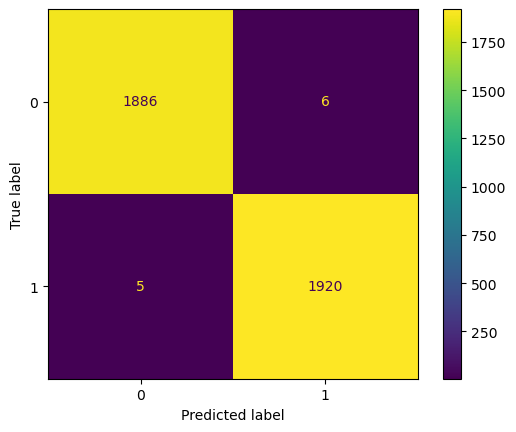

In [223]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
### YOUR CODE HERE ###
cm=confusion_matrix(y_val, y_pred, labels=clf.classes_)
# Create display of confusion matrix
### YOUR CODE HERE ###
displays=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
# Plot confusion matrix
### YOUR CODE HERE ###
displays.plot(values_format="")
# Display plot
### YOUR CODE HERE ###
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

In [227]:
# Create a classification report
# Create classification report for random forest model
### YOUR CODE HERE ###
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       1.00      1.00      1.00      1892
       claim       1.00      1.00      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Question:** What does your classification report show? What does the confusion matrix indicate?

The classification report above shows that the random forest model scores were nearly perfect. The confusion matrix indicates that there were 10 misclassifications—five false postives and five false negatives.

The upper-left quadrant displays the number of true negatives: the number of opinions that the model accurately classified as so.

The upper-right quadrant displays the number of false positives: the number of opinions that the model misclassified as claims.

The lower-left quadrant displays the number of false negatives: the number of claims that the model misclassified as opinions.

The lower-right quadrant displays the number of true positives: the number of claims that the model accurately classified as so.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.


Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.



#### **XGBoost**

In [247]:
xgb_cv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [249]:
#Evaluate XGBoost model
### YOUR CODE HERE ###
y_pred_xgb=xgb_cv.best_estimator_.predict(x_val_final)
y_pred_xgb

array([1, 0, 1, ..., 1, 1, 1])

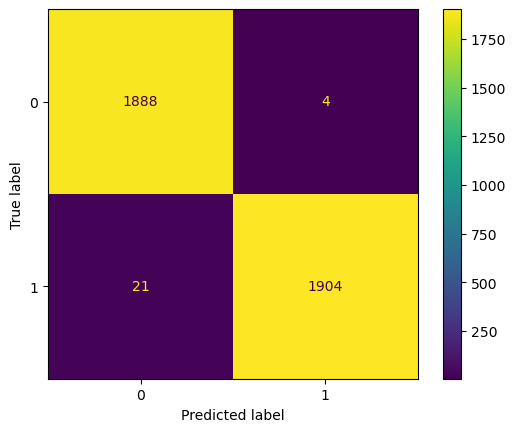

In [252]:
# Compute values for confusion matrix
### YOUR CODE HERE ###
cm=confusion_matrix(y_val, y_pred_xgb, labels=xgb_cv.classes_)
# Create display of confusion matrix
### YOUR CODE HERE ###
display=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)
# Plot confusion matrix
### YOUR CODE HERE ###
display.plot(values_format="")
# Display plot
### YOUR CODE HERE ###
plt.show()

In [255]:
# Create a classification report
### YOUR CODE HERE ###
target_labels=["opinion", "claim"]
print(classification_report(y_val, y_pred_xgb, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

The results of the XGBoost model were also nearly perfect. However, its errors tended to be false negatives. Identifying claims was the priority, so it's important that the model be good at capturing all actual claim videos. The random forest model has a better recall score, and is therefore the champion model.

### **Use champion model to predict on test data**

In [268]:
### YOUR CODE HERE ###

y_pred_champ=clf.best_estimator_.predict(x_test_final)

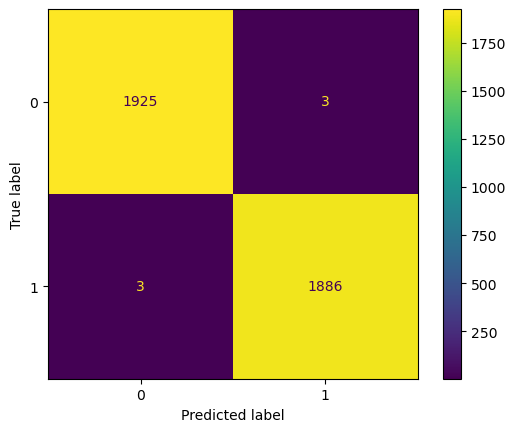

In [270]:
# Compute values for confusion matrix
### YOUR CODE HERE ###
cm=confusion_matrix(y_test, y_pred_champ, labels=champ_rf.classes_)
# Create display of confusion matrix
### YOUR CODE HERE ###
displays=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=champ_rf.classes_)
# Plot confusion matrix
### YOUR CODE HERE ###
displays.plot()
# Display plot
### YOUR CODE HERE ###
plt.show()

#### **Feature importances of champion model**


Text(0, 0.5, 'Mean decrease in impurity')

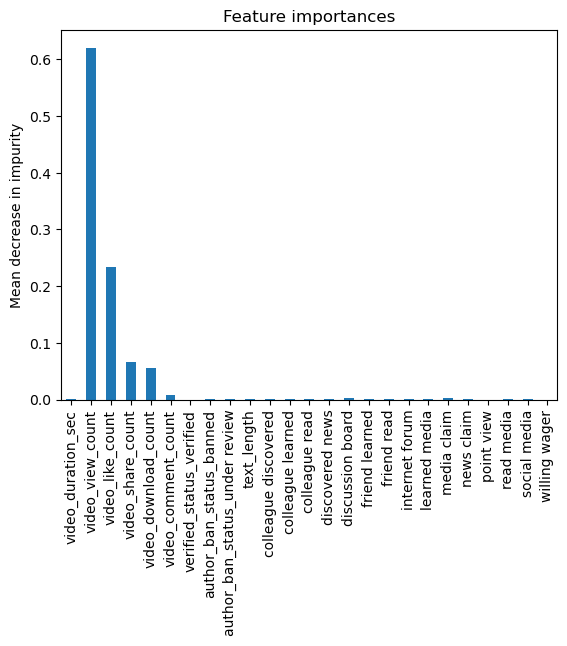

In [282]:
### YOUR CODE HERE ###
importance= clf.best_estimator_.feature_importances_
importance_df=pd.Series(data=importance, index=x_test_final.columns)
fig, ax=plt.subplots()
importance_df.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
#fig.tight_layout()

**Question:** Describe your most predictive features. Were your results surprising?

The most predictive features all were related to engagement levels generated by the video. This is not unexpected, as analysis from prior EDA pointed to this conclusion.

### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

Yes, one can recommend this model because it performed well on both the validation and test holdout data. Furthermore, both precision and F1 scores were consistently high. The model very successfully classified claims and opinions.

2. **What was your model doing? Can you explain how it was making predictions?**

The model's most predictive features were all related to the user engagement levels associated with each video. It was classifying videos based on how many views, likes, shares, and downloads they received.

3. **Are there new features that you can engineer that might improve model performance?**

Because the model currently performs nearly perfectly, there is no need to engineer any new features.

4. **What features would you want to have that would likely improve the performance of your model?**
The current version of the model does not need any new features. However, it would be helpful to have the number of times the video was reported. It would also be useful to have the total number of user reports for all videos posted by each author.


Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.


==> ENTER YOUR RESPONSES HERE

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.